# **BLINKIT ANALAYSIS**

# Import Libraries

In [1]:
import mysql.connector
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Connect to Database

In [2]:
conn = mysql.connector.connect(
  host="localhost",
  user="root",
  password="2526"
)

# Load Dataset

In [3]:
query = "SELECT * FROM blinkit_db.BlinkIT"
df = pd.read_sql(query, conn)
df.head()

,Item_Fat_Content,Item_Identifier,Item_Type,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Item_Visibility,Item_Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


# Data Preprocessing

In [4]:
(df.isnull().sum()/len(df)) *100

Item_Fat_Content              0.000000
Item_Identifier               0.000000
Item_Type                     0.000000
Outlet_Establishment_Year     0.000000
Outlet_Identifier             0.000000
Outlet_Location_Type          0.000000
Outlet_Size                   0.000000
Outlet_Type                   0.000000
Item_Visibility               0.000000
Item_Weight                  17.165317
Sales                         0.000000
Rating                        0.000000
dtype: float64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Fat_Content           8523 non-null   object 
 1   Item_Identifier            8523 non-null   object 
 2   Item_Type                  8523 non-null   object 
 3   Outlet_Establishment_Year  8523 non-null   int64  
 4   Outlet_Identifier          8523 non-null   object 
 5   Outlet_Location_Type       8523 non-null   object 
 6   Outlet_Size                8523 non-null   object 
 7   Outlet_Type                8523 non-null   object 
 8   Item_Visibility            8523 non-null   float64
 9   Item_Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df.shape

(8523, 12)

In [7]:
df["Item_Identifier"].nunique()

1559

In [8]:
df["Item_Identifier"].value_counts()

Item_Identifier
FDW13    10
FDG33    10
FDX20     9
NCL31     9
FDQ40     9
         ..
FDN52     1
FDQ60     1
FDT35     1
FDK57     1
FDE52     1
Name: count, Length: 1559, dtype: int64

In [9]:
cat_col1 = df.select_dtypes(include='object').columns
cat_col1

Index(['Item_Fat_Content', 'Item_Identifier', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type'],
      dtype='object')

In [10]:
cat_col = df[['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type']].columns
cat_col

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type'],
      dtype='object')

In [11]:
num_col = df.select_dtypes(include=['int64', 'float64']).columns
num_col

Index(['Outlet_Establishment_Year', 'Item_Visibility', 'Item_Weight', 'Sales',
       'Rating'],
      dtype='object')

# Exploratory Data Analysis ( EDA )

In [12]:
df.describe()

,Outlet_Establishment_Year,Item_Visibility,Item_Weight,Sales,Rating
count,8523.000000,8523.000000,7060.000000,8523.000000,8523.000000
mean,2016.450546,0.066132,12.857645,140.992783,3.965857
std,3.189396,0.051598,4.643456,62.275067,0.605651
min,2011.000000,0.000000,4.555000,31.290000,1.000000
25%,2014.000000,0.026989,8.773750,93.826500,4.000000
50%,2016.000000,0.053931,12.600000,143.012800,4.000000
75%,2018.000000,0.094585,16.850000,185.643700,4.200000
max,2022.000000,0.328391,21.350000,266.888400,5.000000


## Univariate Analysis

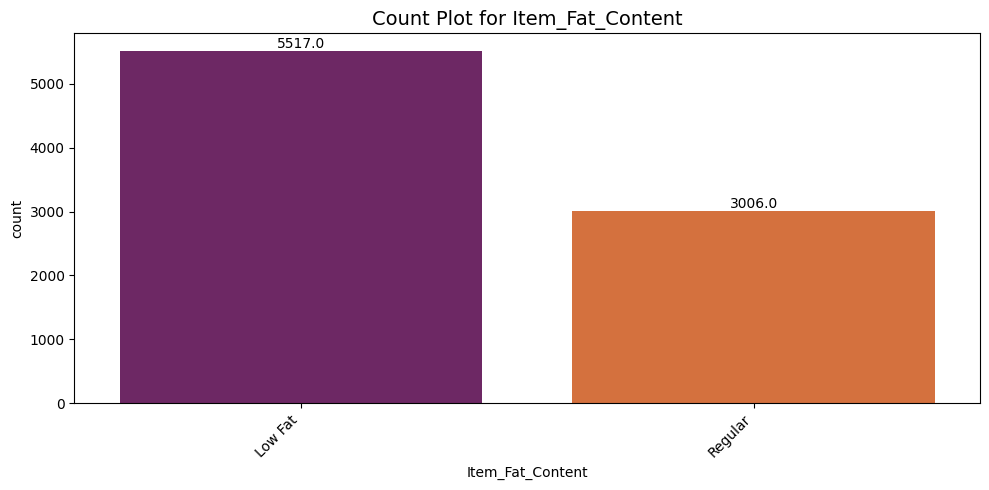

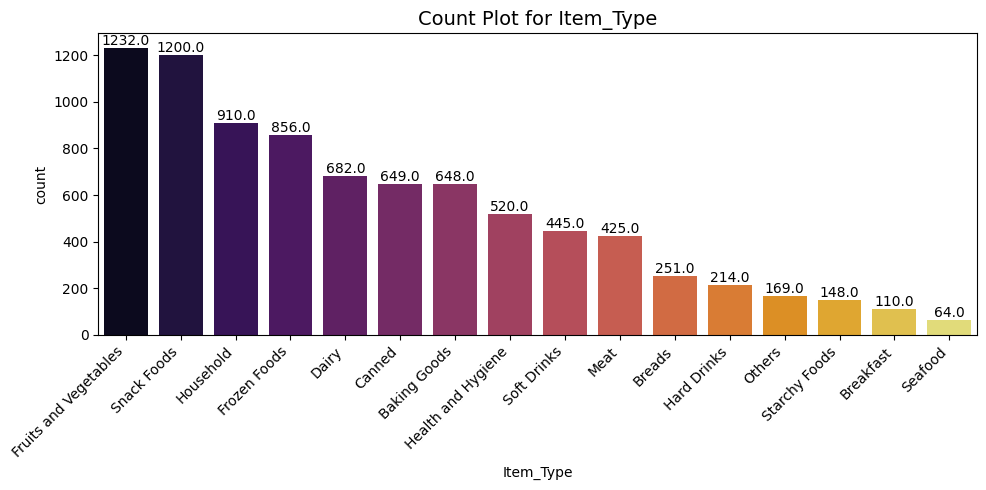

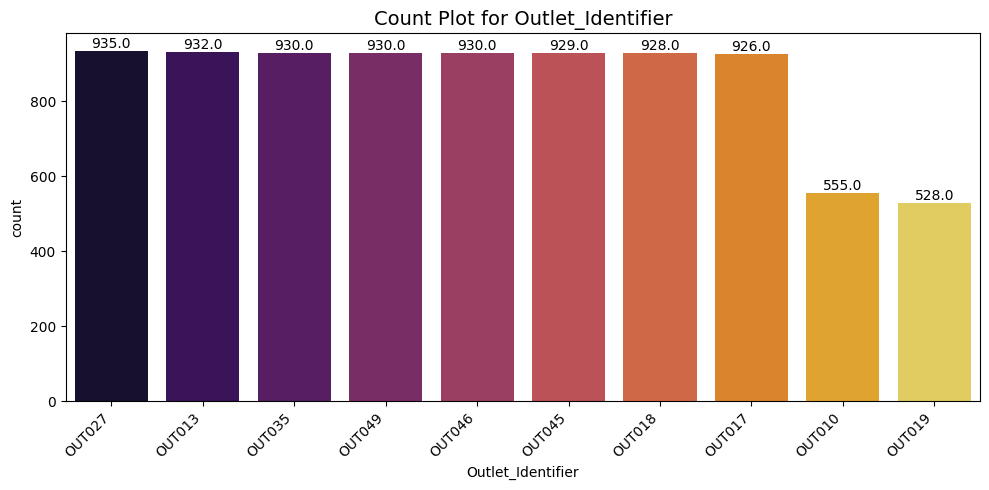

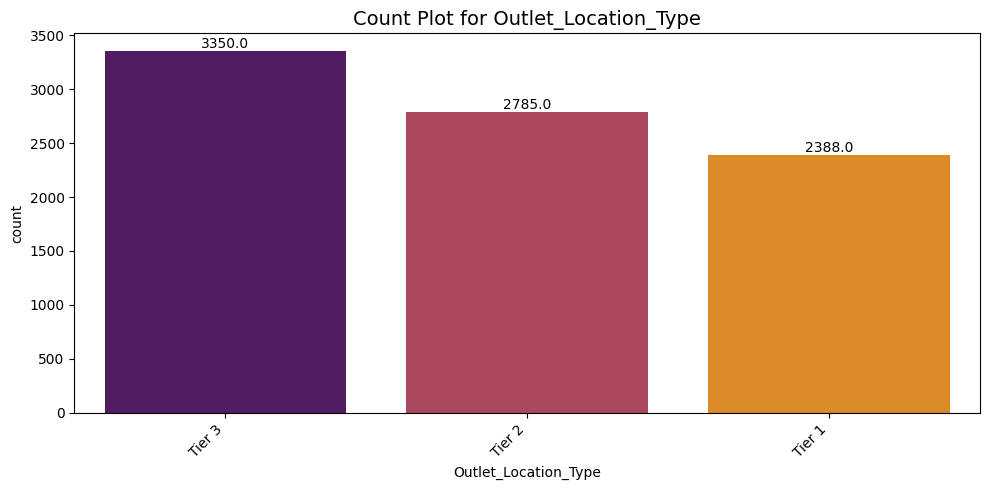

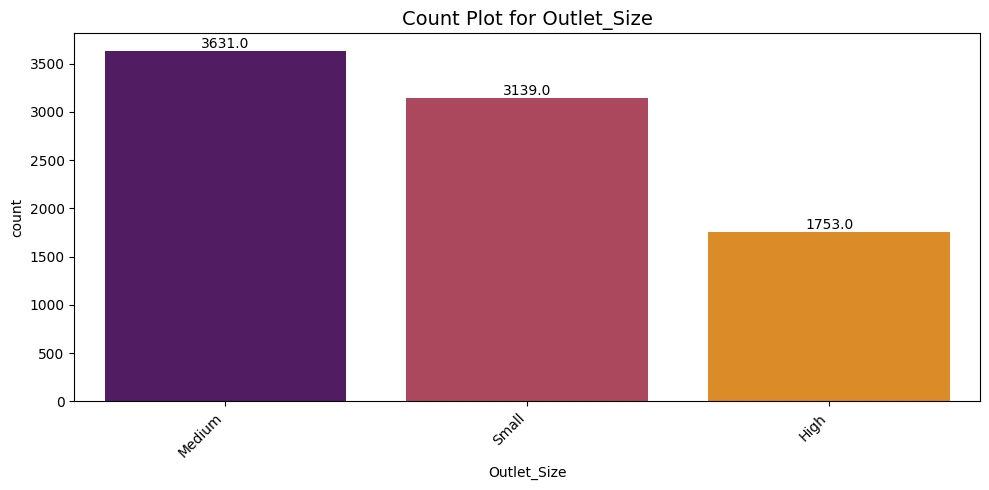

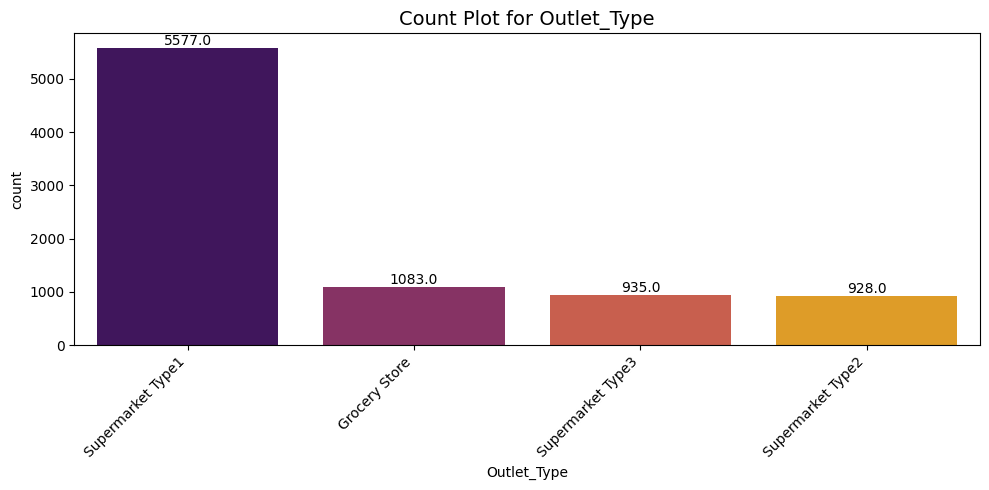

In [13]:
# Loop through categorical columns
for col in cat_col:
    plt.figure(figsize=(10,5))
    ax = sns.countplot(
        data=df,
        x=col,
        order=df[col].value_counts().index,
        palette="inferno" 
    )

    # Add value labels on bars
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10, color='black')
    
    plt.title(f"Count Plot for {col}", fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## Bivariate Analysis

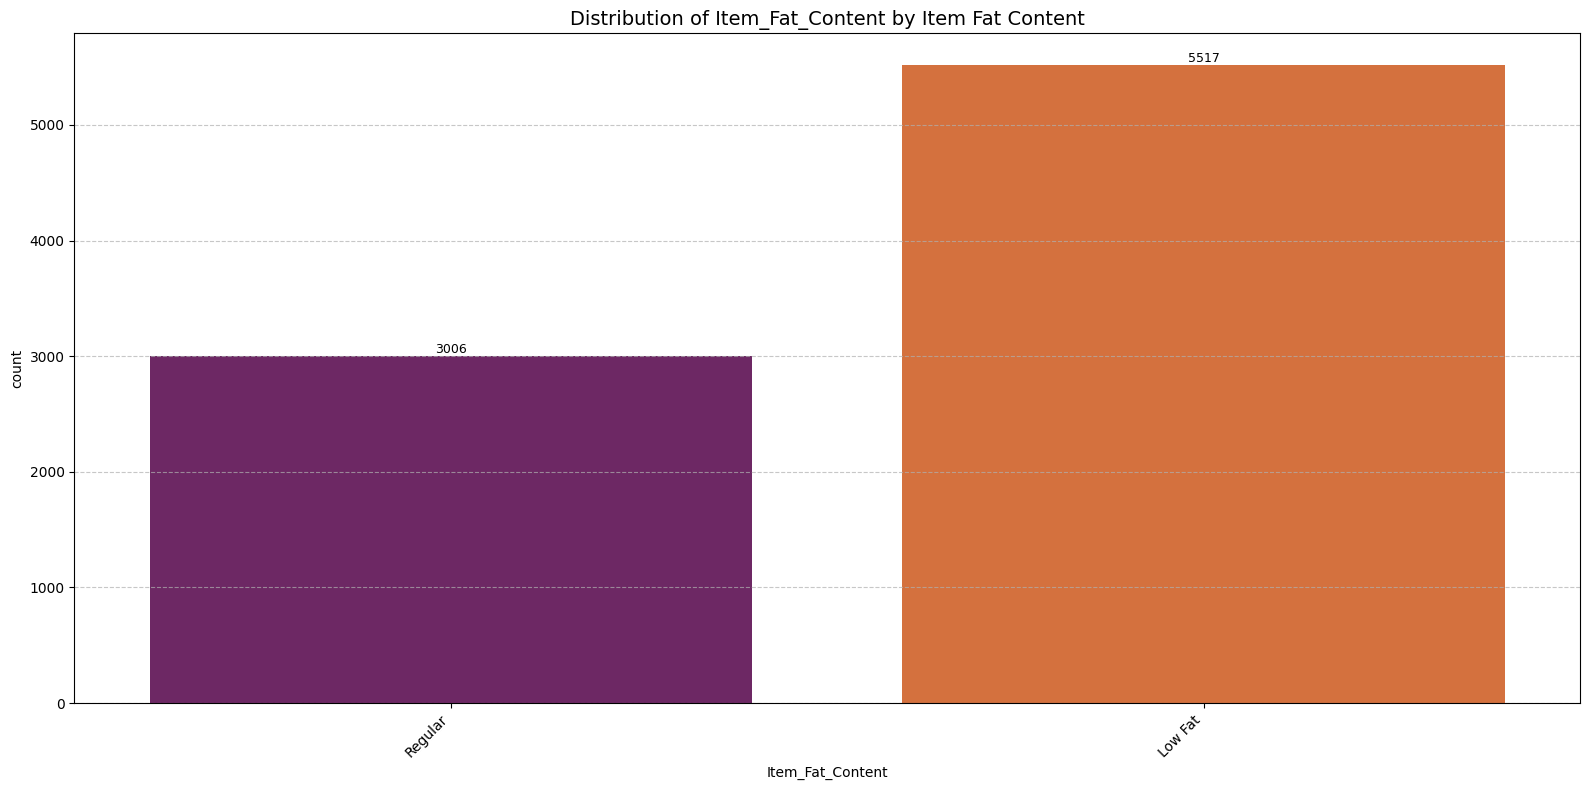

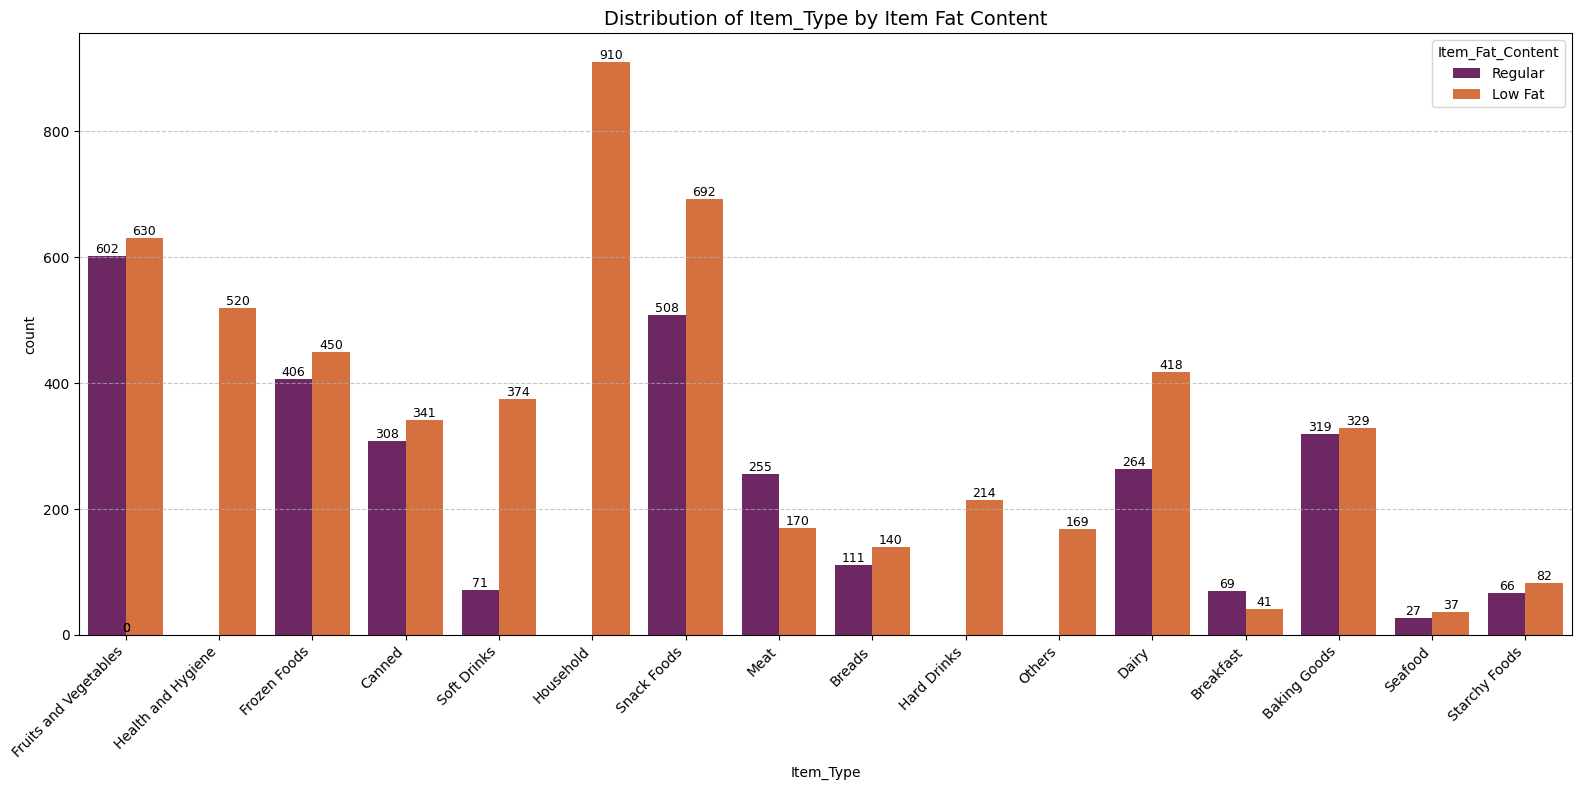

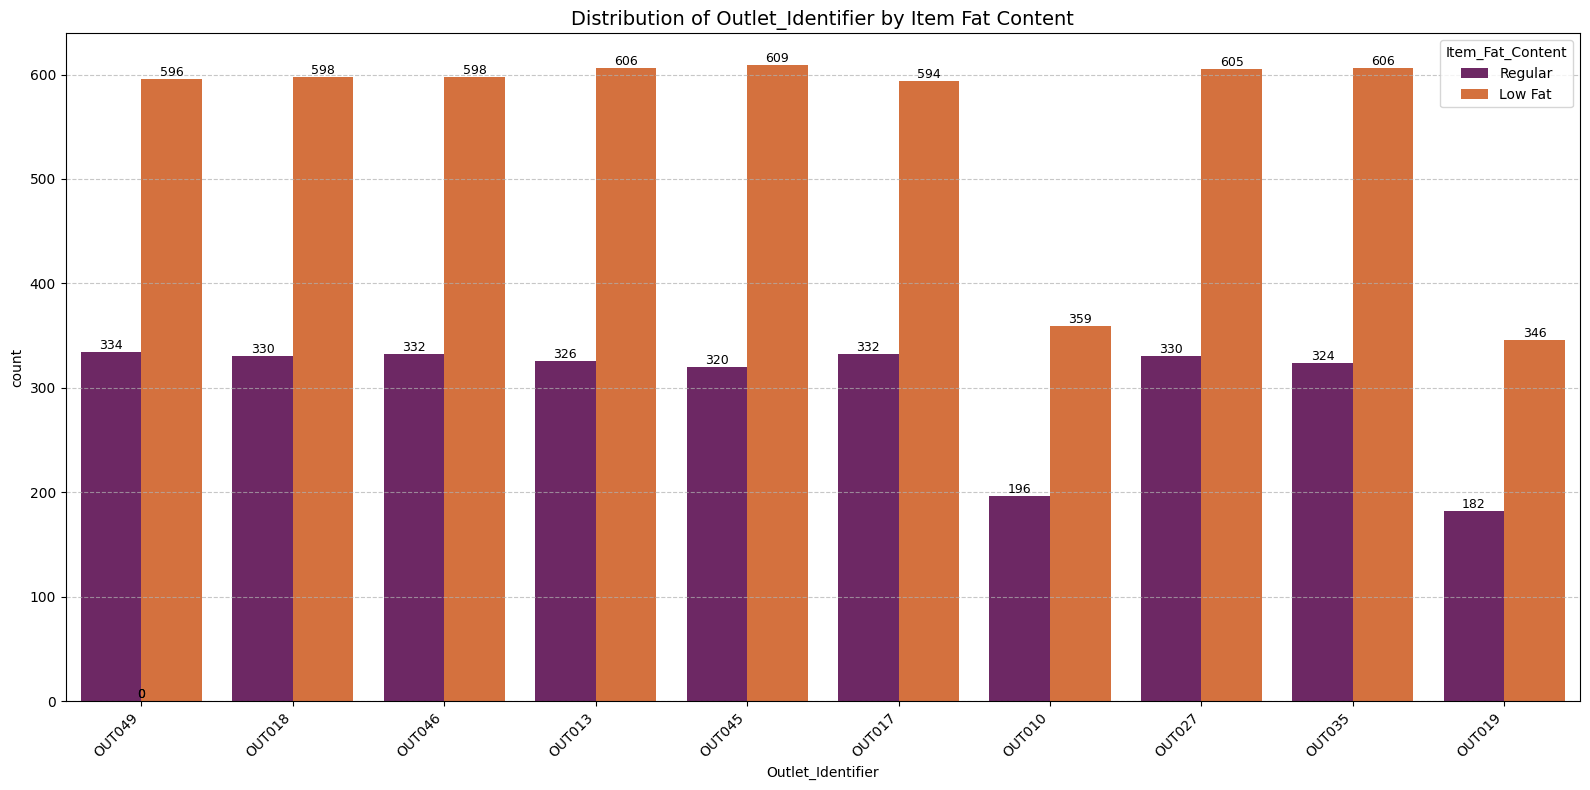

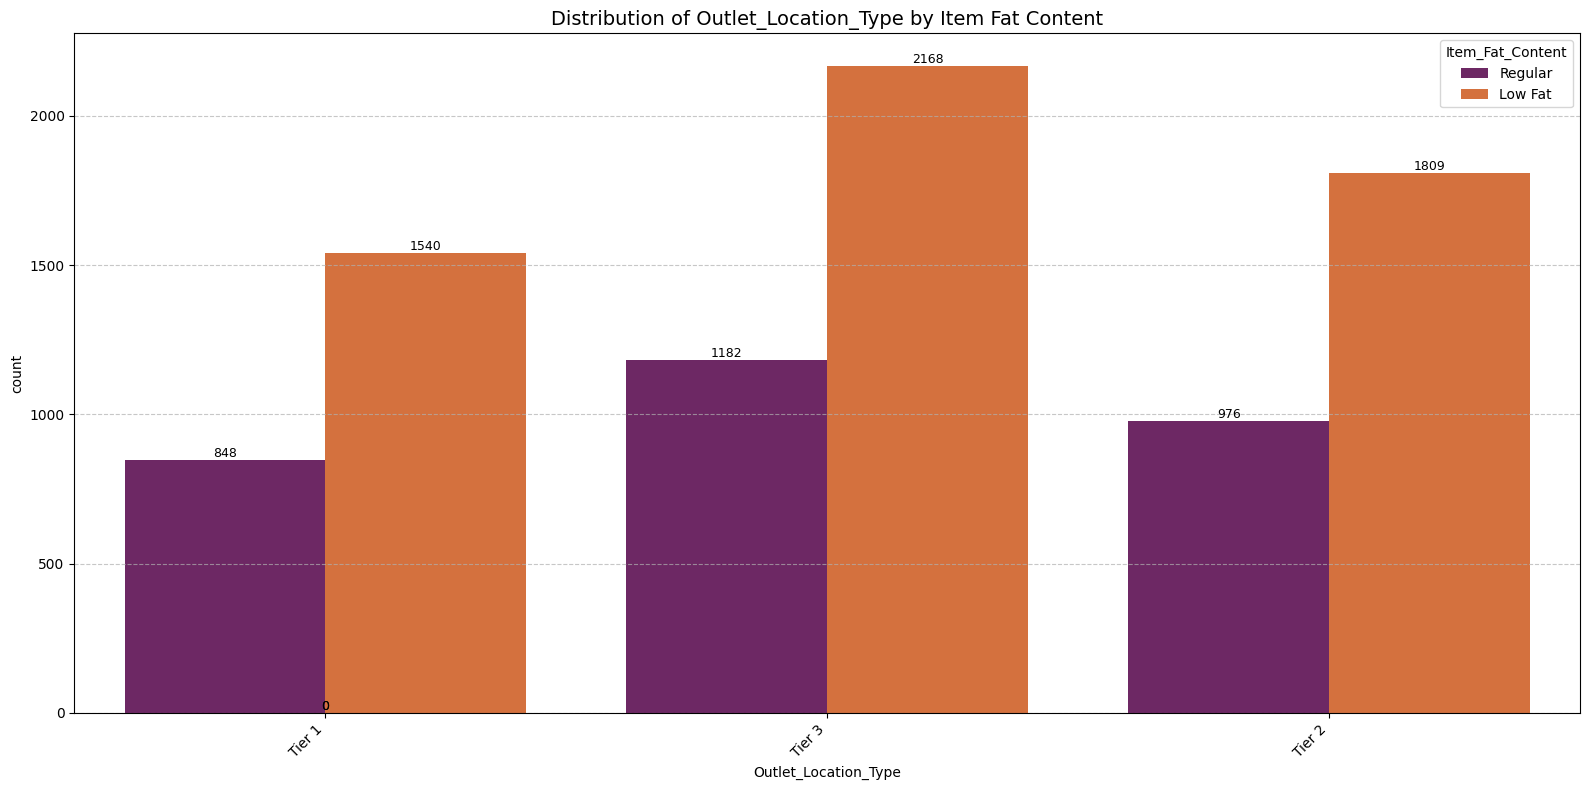

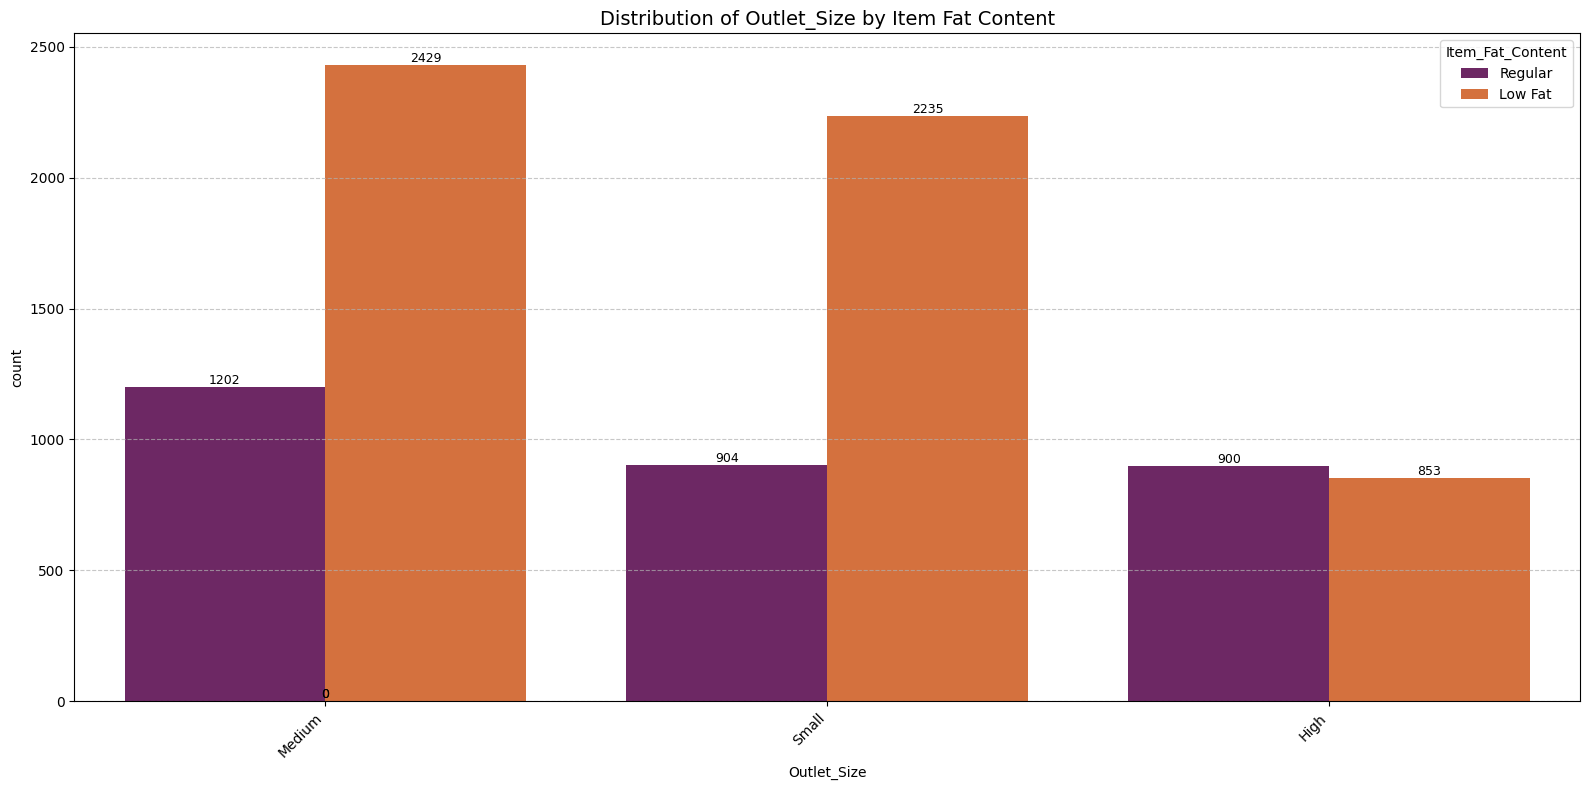

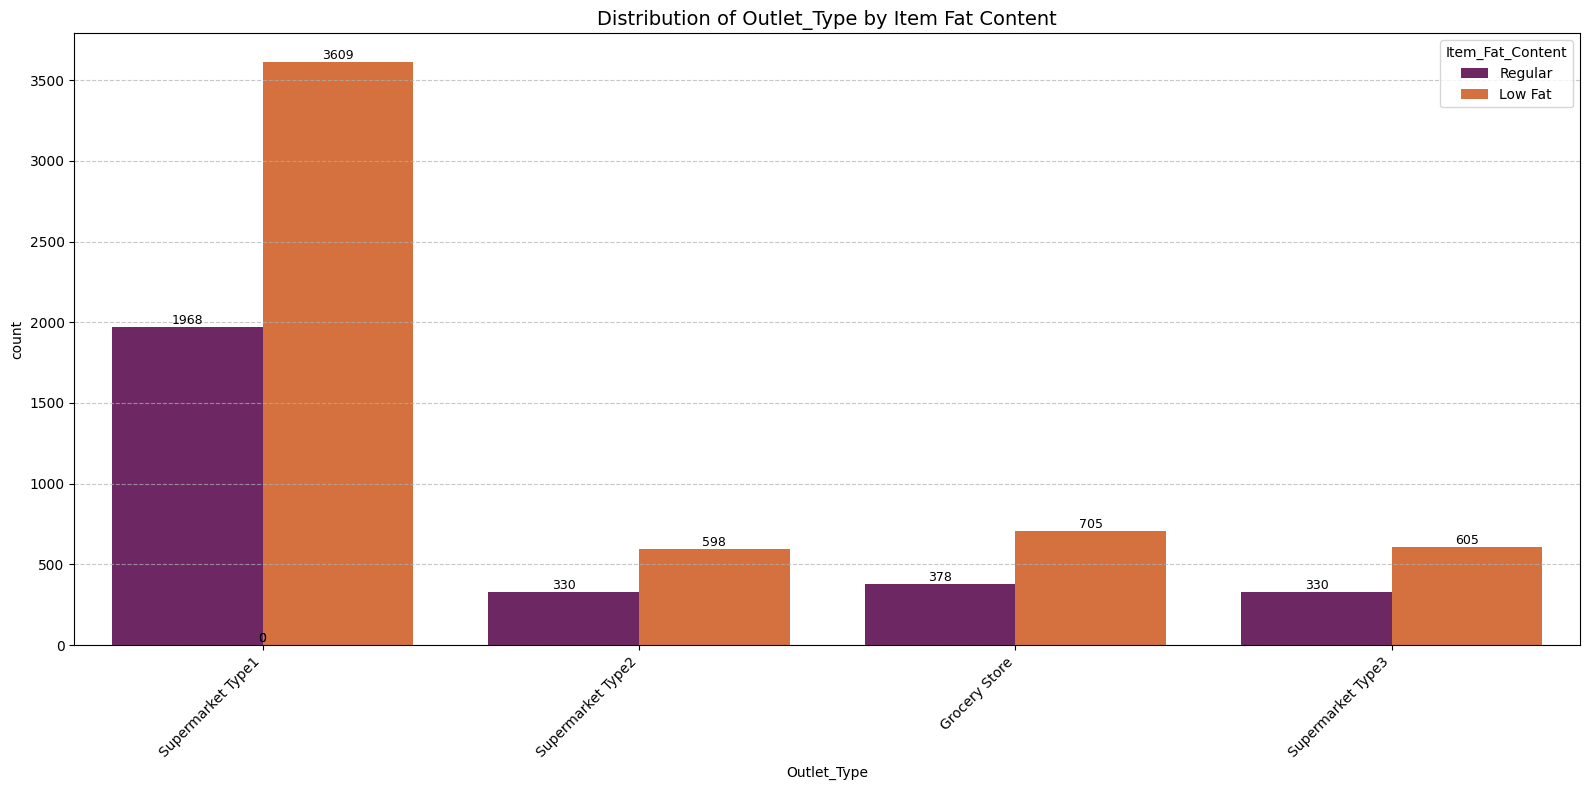

In [14]:
for i, predictor in enumerate(cat_col):
    plt.figure(figsize=(16, 8))  # Wider chart
    ax = sns.countplot(data=df, x=predictor, hue="Item_Fat_Content", palette="inferno")
    
    # Add count labels on bars
    for p in ax.patches:
        height = int(p.get_height())
        ax.annotate(height, (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=9)

    plt.title(f"Distribution of {predictor} by Item Fat Content", fontsize=14)
    plt.xticks(rotation=45, ha='right')  # Rotate x-labels
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

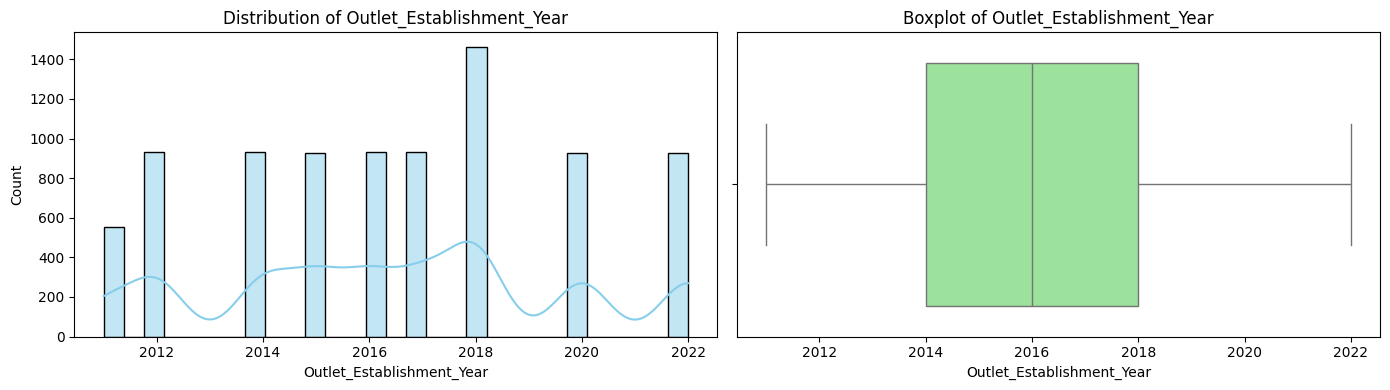

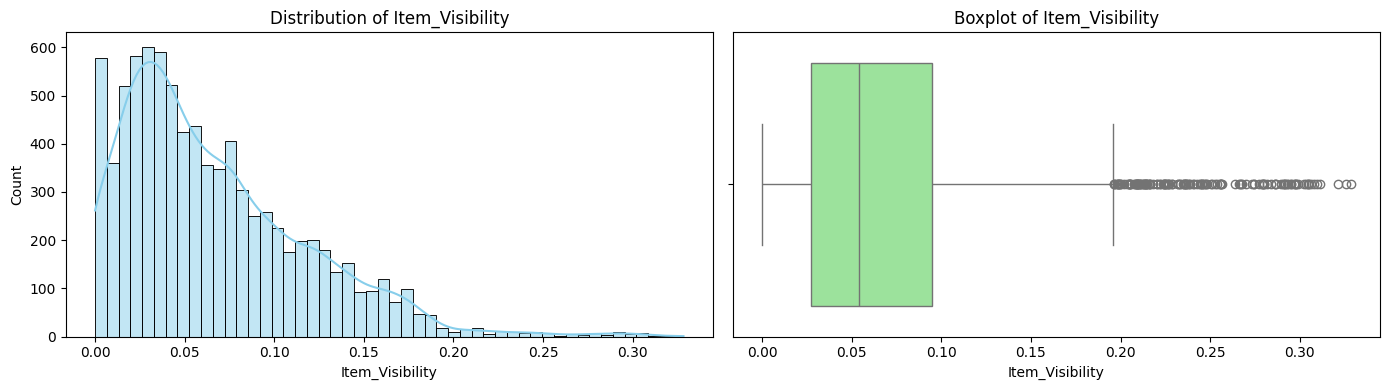

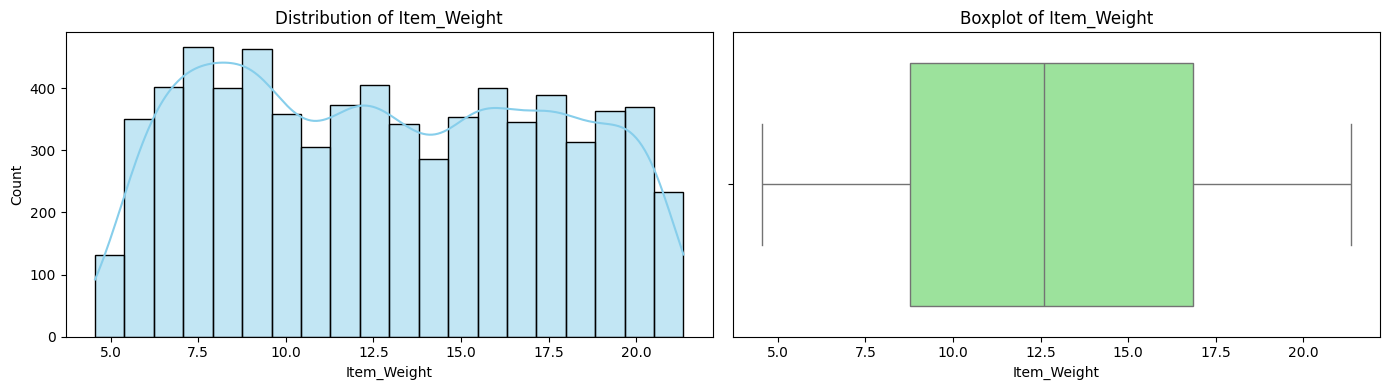

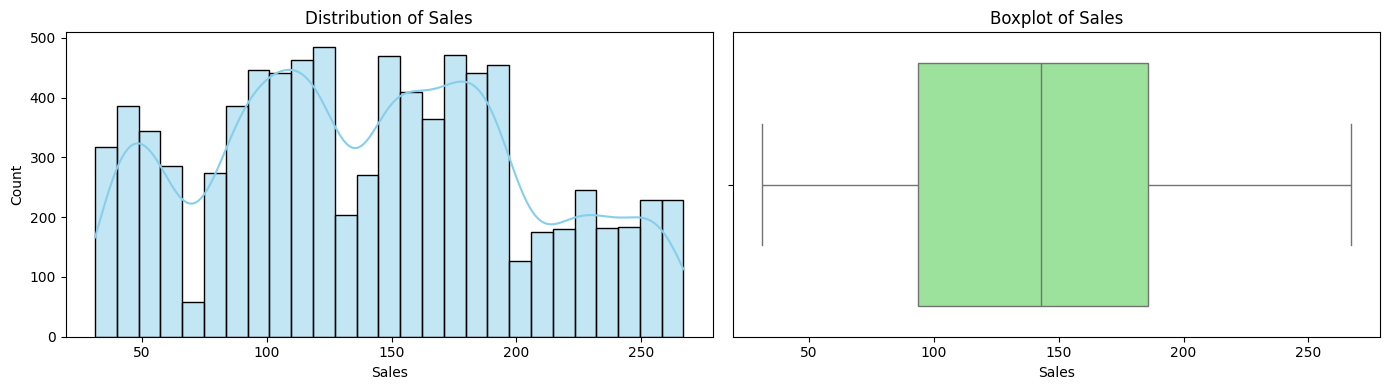

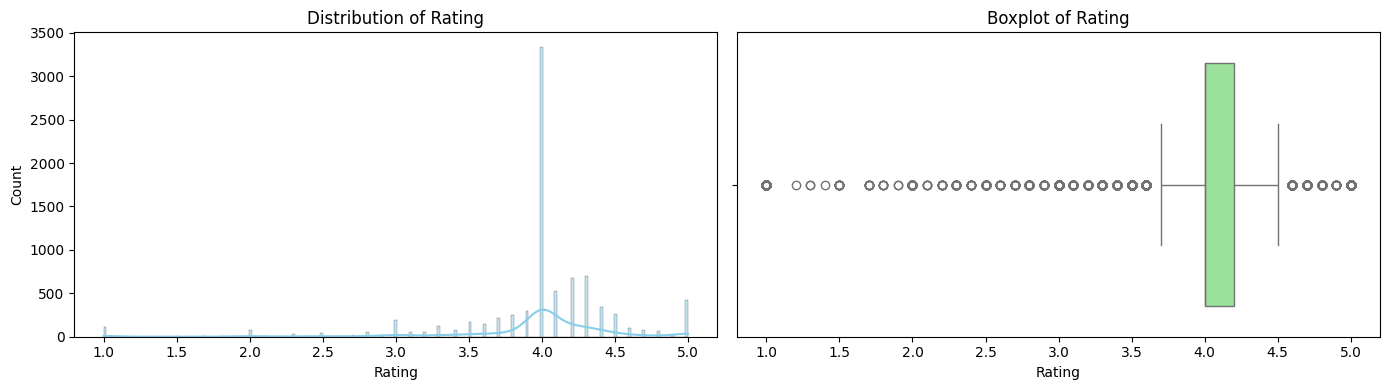

In [15]:
# Plot histogram and boxplot for each numerical column
for col in num_col:
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))

    # Histogram
    sns.histplot(df[col], kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f'Distribution of {col}')
    axes[0].set_xlabel(col)

    # Boxplot
    sns.boxplot(x=df[col], ax=axes[1], color='lightgreen')
    axes[1].set_title(f'Boxplot of {col}')
    axes[1].set_xlabel(col)

    plt.tight_layout()
    plt.show()

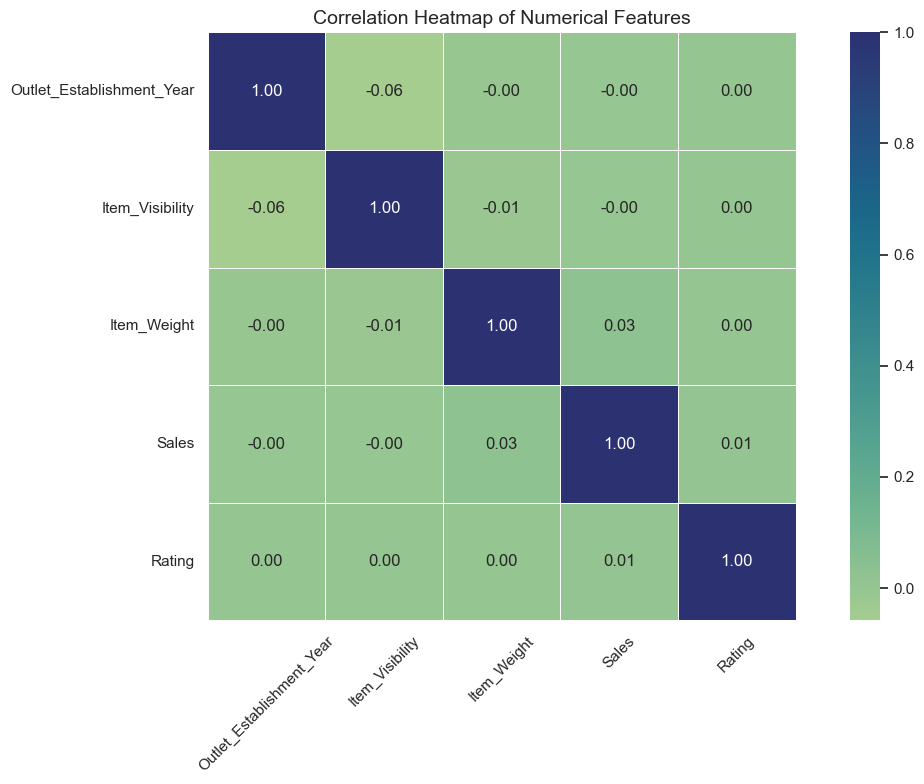

In [16]:
# Calculate correlation matrix
correlation_matrix = df[num_col].corr()

# Set plot size and style
plt.figure(figsize=(12, 8))
sns.set(style="white")

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="crest", square=True, linewidths=.5)

# Title
plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Business ( KPI's ) Requirements

In [17]:
# Total Sales
Total_Sales = df["Sales"].sum()

# Average Sales
Avg_Sales = df["Sales"].mean()

# No of item sold
no_of_item_sold = df["Sales"].count()

# Average Ratings
Avg_Ratings = df["Rating"].mean()

# Display
print(f"Total Sales: ${Total_Sales:,.2f}")
print(f"Average Sales: ${Avg_Sales:,.2f}")
print(f"No of item sold: ${no_of_item_sold:,.2f}")
print(f"Average Ratings: ${Avg_Ratings:,.1f}")

Total Sales: $1,201,681.49
Average Sales: $140.99
No of item sold: $8,523.00
Average Ratings: $4.0


# Charts Requirements

### 1. Total Sales by Outlet Establishment

In [18]:
# Step 1: Group by Outlet_Establishment_Year and get total Sales
outlet_establis = df.groupby('Outlet_Establishment_Year')[['Sales']].sum().reset_index()

# Step 2: Format Sales column into currency string (e.g., $123,456)
def format_dollars(x):
    return "${:,.0f}".format(x)

outlet_establis['Sales'] = outlet_establis['Sales'].apply(lambda x: format_dollars(x))

# Step 3: Display result
outlet_establis


,Outlet_Establishment_Year,Sales
0,2011,"$78,132"
1,2012,"$130,477"
2,2014,"$131,809"
3,2015,"$130,943"
4,2016,"$132,113"
5,2017,"$133,104"
6,2018,"$204,522"
7,2020,"$129,104"
8,2022,"$131,478"


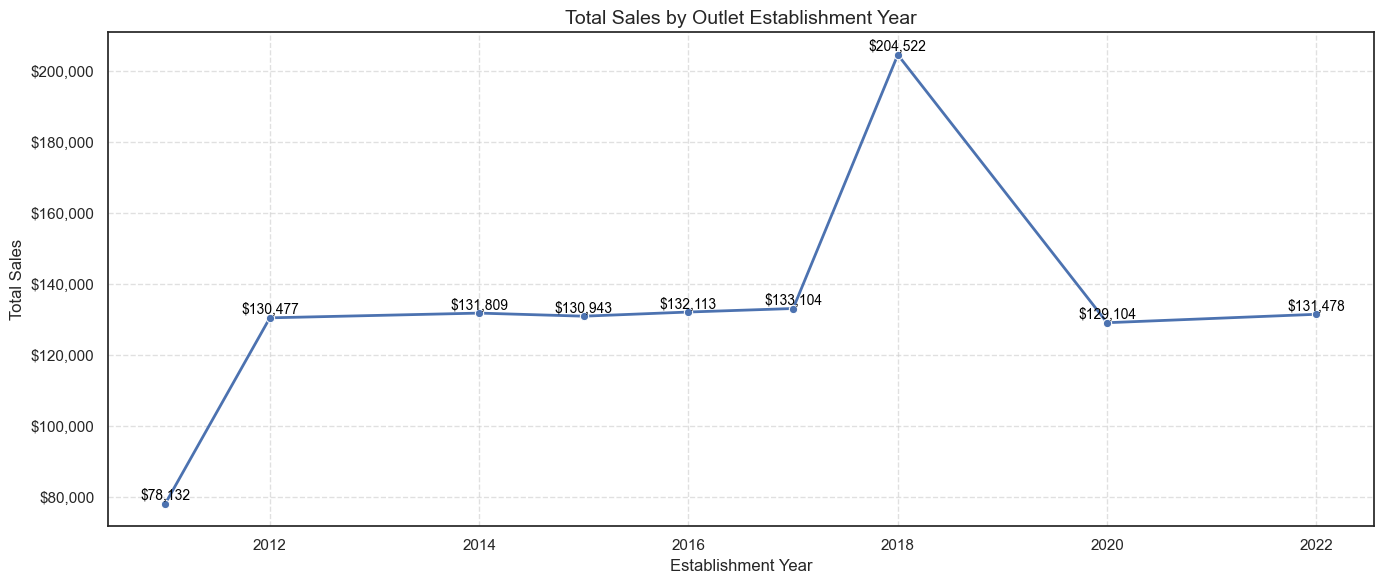

In [19]:
# Group total sales (numeric)
outlet_establis = df.groupby('Outlet_Establishment_Year')[['Sales']].sum().reset_index()
outlet_establis = outlet_establis.sort_values('Outlet_Establishment_Year')

# Plot
plt.figure(figsize=(14, 6))
ax = sns.lineplot(data=outlet_establis, x='Outlet_Establishment_Year', y='Sales', marker='o', linewidth=2)

# Format y-axis as dollar values
import matplotlib.ticker as mtick
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

# Annotate each point with actual value
for i in range(len(outlet_establis)):
    year = outlet_establis.loc[i, 'Outlet_Establishment_Year']
    sales = outlet_establis.loc[i, 'Sales']
    label = f"${sales:,.0f}"
    plt.text(year, sales + 1000, label, ha='center', fontsize=10, color='black')

# Titles and labels
plt.title('Total Sales by Outlet Establishment Year', fontsize=14)
plt.xlabel('Establishment Year', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### 2. Sales by Outlet Size

In [20]:
outlet_size1 = df.groupby(["Outlet_Size"])[['Sales']].sum().reset_index()
outlet_size1["Sales"] = outlet_size1["Sales"].apply(lambda x: format_dollars(x))
outlet_size1

,Outlet_Size,Sales
0,High,"$248,992"
1,Medium,"$507,896"
2,Small,"$444,794"


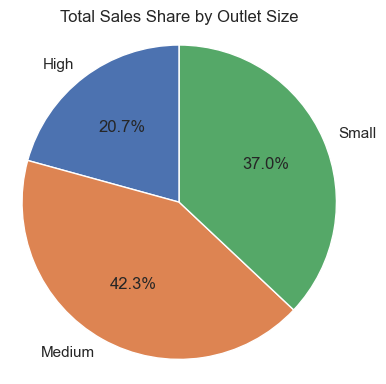

In [21]:
# Group data
size_by_outlet = df.groupby('Outlet_Size')['Sales'].sum()

# Pie chart
plt.figure(figsize=(4, 4))
plt.pie(
    size_by_outlet,
    labels=size_by_outlet.index,
    autopct='%1.1f%%',
    startangle=90,
)

plt.title('Total Sales Share by Outlet Size', fontsize=12)
plt.axis('equal')  # Make pie chart a circle
plt.tight_layout()
plt.show()

### 3. Sales by Outlet Location

In [22]:
outlet_loc = df.groupby(["Outlet_Location_Type"])[['Sales']].sum().reset_index()
outlet_loc["Sales"] = outlet_loc["Sales"].apply(lambda x: format_dollars(x))
outlet_loc

,Outlet_Location_Type,Sales
0,Tier 1,"$336,398"
1,Tier 2,"$393,151"
2,Tier 3,"$472,133"


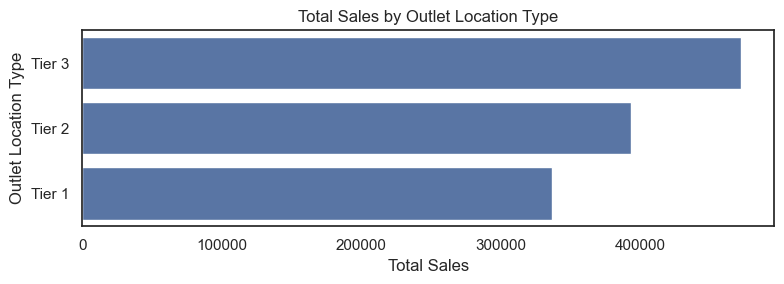

In [23]:
import plotly.express as px

# Group Sales by Outlet Location
outlet_location = df.groupby('Outlet_Location_Type')[['Sales']].sum().reset_index()
outlet_location = outlet_location.sort_values('Sales', ascending=False)

plt.figure(figsize=(8,3))
ax = sns.barplot(x='Sales', y='Outlet_Location_Type', data=outlet_location)

plt.title('Total Sales by Outlet Location Type')
plt.xlabel('Total Sales')
plt.ylabel('Outlet Location Type')

plt.tight_layout()
plt.show()

### 4. Total Sales by Fat Content

In [24]:
fat_sales = df.groupby(["Item_Fat_Content"])[['Sales']].sum().reset_index()
fat_sales["Sales"] = fat_sales["Sales"].apply(lambda x: format_dollars(x))
fat_sales

,Item_Fat_Content,Sales
0,Low Fat,"$776,320"
1,Regular,"$425,362"


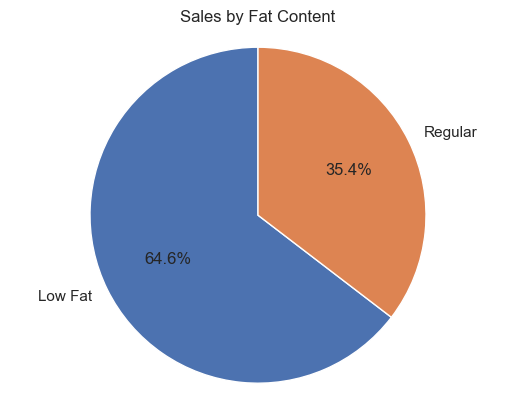

In [25]:
sales_by_fat = df.groupby('Item_Fat_Content')['Sales'].sum()

plt.pie(
    sales_by_fat,
    labels=sales_by_fat.index,
    autopct='%1.1f%%',
    startangle=90
)

plt.title('Sales by Fat Content', fontsize=12)
plt.axis('equal')  # Keeps pie circular
plt.show()

### 5. Total Sales by Item Type

In [26]:
item_sales = df.groupby(["Item_Type"])[['Sales']].sum()
item_sales = item_sales.sort_values(by='Sales', ascending=False).reset_index()
item_sales["Sales"] = item_sales["Sales"].apply(lambda x: format_dollars(x))
item_sales

,Item_Type,Sales
0,Fruits and Vegetables,"$178,124"
1,Snack Foods,"$175,434"
2,Household,"$135,977"
3,Frozen Foods,"$118,559"
4,Dairy,"$101,276"
5,Canned,"$90,707"
6,Baking Goods,"$81,895"
7,Health and Hygiene,"$68,026"
8,Meat,"$59,450"
9,Soft Drinks,"$58,514"


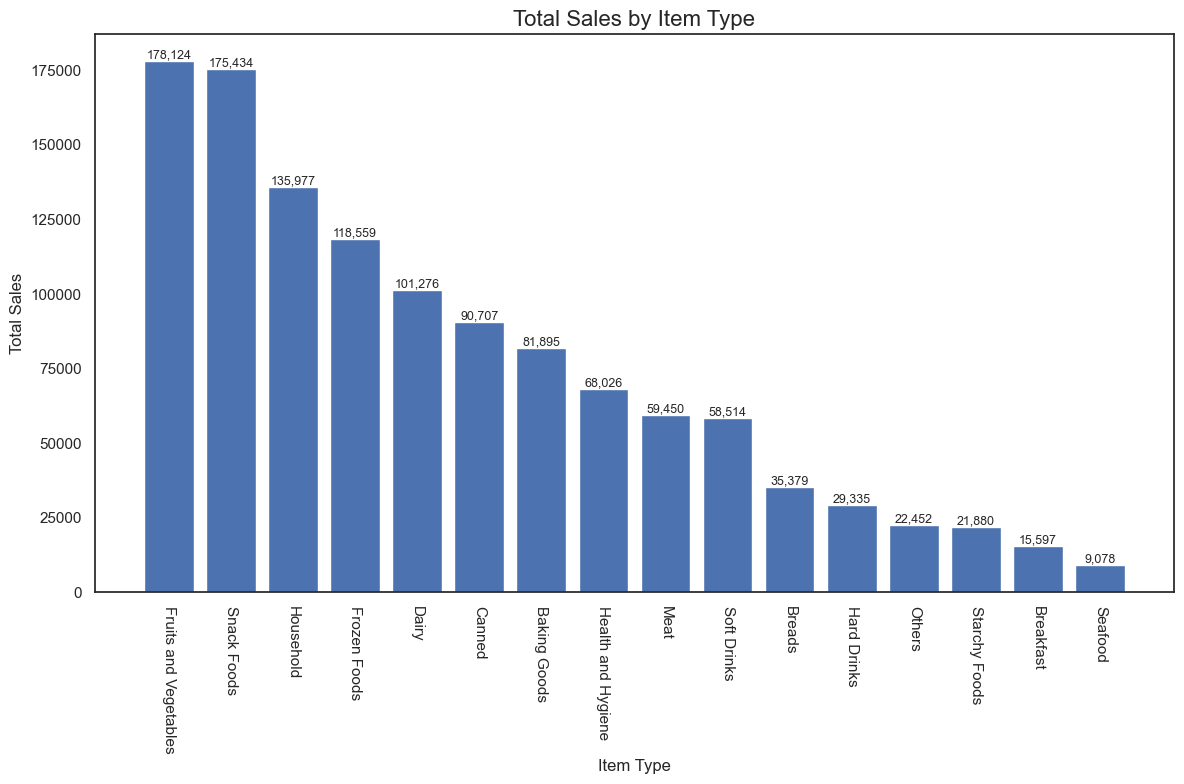

In [27]:
item_sales = df.groupby('Item_Type')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
bars = plt.bar(item_sales.index, item_sales.values)

plt.xticks(rotation=-90)
plt.title('Total Sales by Item Type', fontsize=16)
plt.xlabel('Item Type', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

# Add value labels on bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f"{bar.get_height():,.0f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

### 6. Fat Content by Outlet Total Sales

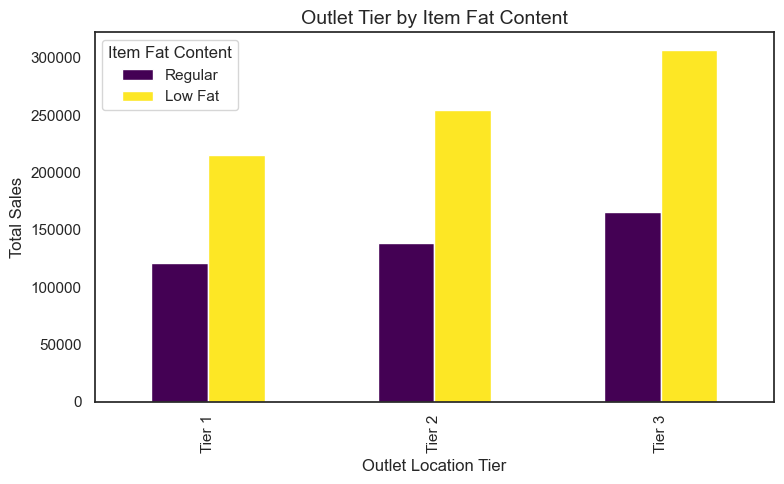

In [28]:
# Step 1: Group data
fat_outlet_sales = df.groupby(['Outlet_Location_Type', 'Item_Fat_Content'])['Sales'].sum().unstack()
fat_outlet_sales = fat_outlet_sales[['Regular','Low Fat']]

# Step 2: Plot stacked bar chart
ax = fat_outlet_sales.plot(
    kind='bar',
    figsize=(8, 5),
    colormap='viridis'  # You can try other palettes like 'plasma', 'tab20c', etc.
)

# Step 3: Formatting
plt.title('Outlet Tier by Item Fat Content', fontsize=14)
plt.xlabel('Outlet Location Tier', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.legend(title='Item Fat Content')
plt.tight_layout()
plt.show()